# Scatter plot
- Agora que já vimos como fazer várias customizações, vamos apenas apresentar outros plots disponíveis na biblioteca
- Todavia, como sempre falo, é interessante consultar a documentação
    - Existe uma [galeria](https://matplotlib.org/stable/gallery/index.html) que mostra diversas opções de plots disponíveis
- Neste notebook vamos explorar o `scatter` que nada mais é do que um plot de pontos no espaço

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

- **Carregando os mesmos dados usados no notebook anterior:**

In [29]:
df = pd.read_csv("assets/salesman_pivot.csv")
bob = df["Bob"].rolling(10).sum().dropna()
dave = df["Dave"].rolling(10).sum().dropna()

- **Criando o plot:**

Text(0, 0.5, 'Reais')

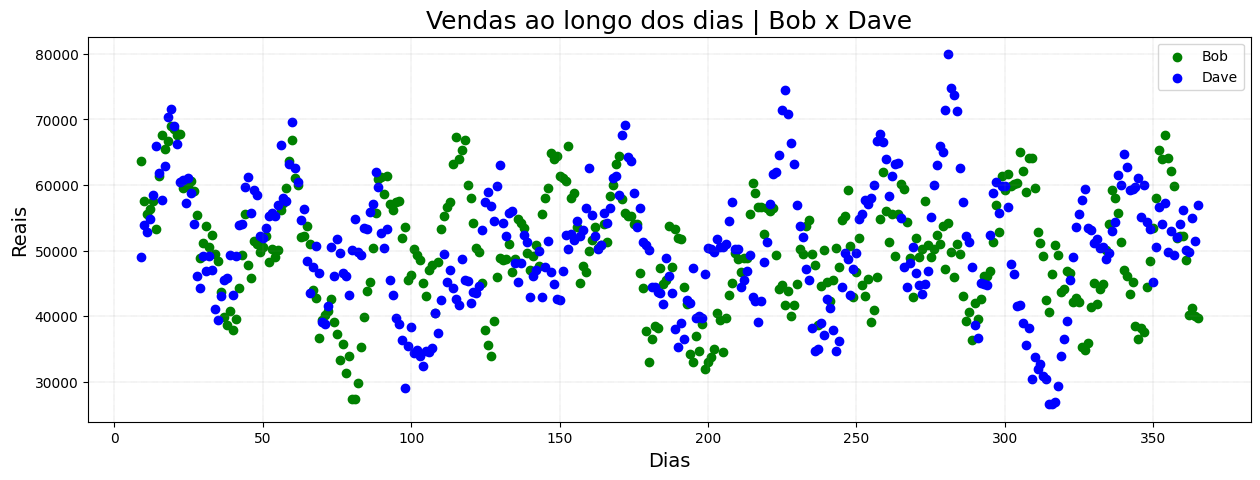

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
days = bob.index
ax.scatter(days, bob, color="g", label="Bob")
ax.scatter(days, dave, color="b", label="Dave")
ax.legend()
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set_title('Vendas ao longo dos dias | Bob x Dave', size=18)
ax.set_xlabel('Dias', size=14)
ax.set_ylabel('Reais', size=14)

- Perceba, que diferentemente do `ax.plot`:
    - Nós somos obrigados a definir ambos os eixos x e y
    - Os pontos não são conectados
    
- **Basicamente tudo que usamos anteriormente, pode ser explorado aqui também**
    - Como já foi feito no notebook anterior, não vamos repetir tudo aqui

___
## Exercício 3
- Para o plot anterior, faça:
    1. Inclua duas retas verticais, uma para limitar o valor máximo e outra para o valor mínimo. A cor da reta deve ser a mesma da cor do vendedor que atingiu tanto o menor valor quanto o maior
    2. Formate os valores dos ticks do eixo y para mostrar R$
    3. Altere os marcadores (markers) de ambos os venderdores para um de seu interesse
___

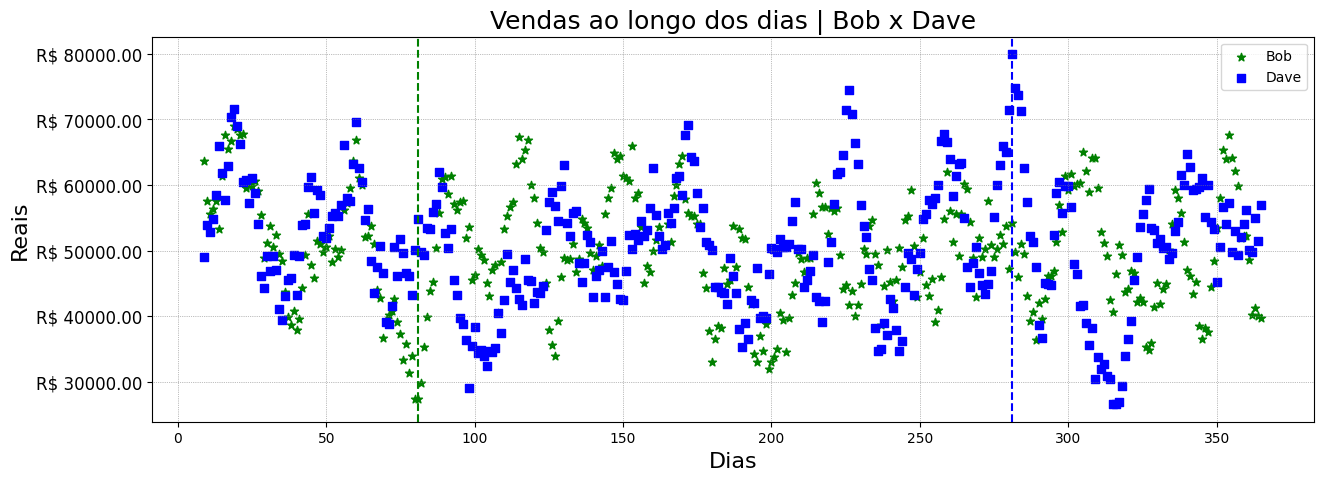

In [31]:
fig2, ax2 = plt.subplots(figsize=(15,5))
days = bob.index
ax2.scatter(days, bob, color="g", marker='*', label="Bob")
ax2.scatter(days, dave, color="b", marker='s', label="Dave")
ax2.legend()
ax2.grid(True, color='gray', linestyle='dotted', linewidth=0.5)
ax2.set_title('Vendas ao longo dos dias | Bob x Dave', size=18)
ax2.set_xlabel('Dias', size=16)
ax2.set_ylabel('Reais', size=16)


day_max_value = 0
color_max = ''

if (bob.max() > dave.max()):
    day_max_value = bob.idxmax()
    val_day_max = bob.max()
    color_max = 'green'
else:
    day_max_value = dave.idxmax()
    val_day_max = dave.max()
    color_max = 'blue'

ax2.axvline(day_max_value, color=color_max, ls='dashed') # criando a linha vertical para o dia de venda maxima

day_min_value = 0
color_min = ''

if (bob.min() > dave.min()):
    day_min_value = bob.idxmin()
    val_day_min = bob.min()
    color_min = 'green'
else:
    day_min_value = dave.idxmin()
    val_day_min = dave.min()
    color_min = 'blue'

ax2.axvline(day_min_value, color=color_min, ls='dashed') # criando a linha vertical para o dia de venda minima


ax2.tick_params(axis='y', labelsize=12, labelcolor='black') # alterando a cor dos ticks do eixo Y

fmt = StrMethodFormatter("R$ {x:.2f}") # criando um formatador para inserir R$ no eixo Y
ax2.yaxis.set_major_formatter(fmt) # aplicando o formatodor

- Podemos aumentar o tamanho dos marcadores de acordo com algum peso que atribuimos a eles
- Neste exemplo, vamos ponderar por valor de vendas
- Para acessar os scatters ja adicionados no plot, acessamos o atributo `collections`

In [32]:
ax2.collections

<Axes.ArtistList of 2 collections>

- Vamos criar o tamanho dos marcadores de acordo com os valores de vendas

In [33]:
lam_siz = lambda ser: ((ser - ser.min()) / (ser.max() - ser.min())) * 200

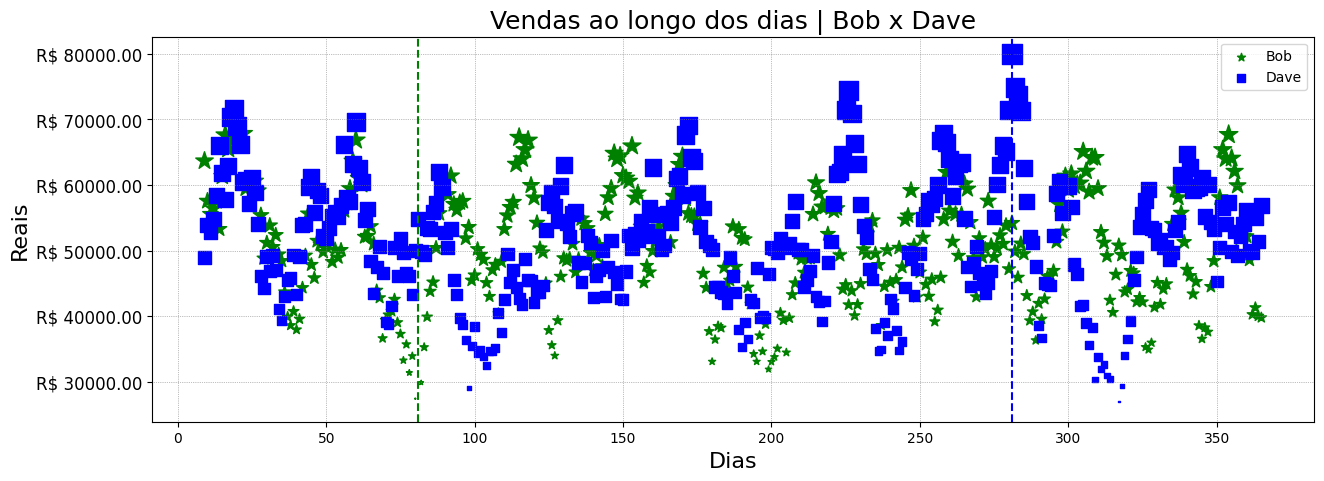

In [34]:
ax2.collections[0].set_sizes(lam_siz(bob))
ax2.collections[1].set_sizes(lam_siz(dave))
fig2

- Porém, perceba que ficou muita coisa sobrepostas. Podemos alterar a opacidade

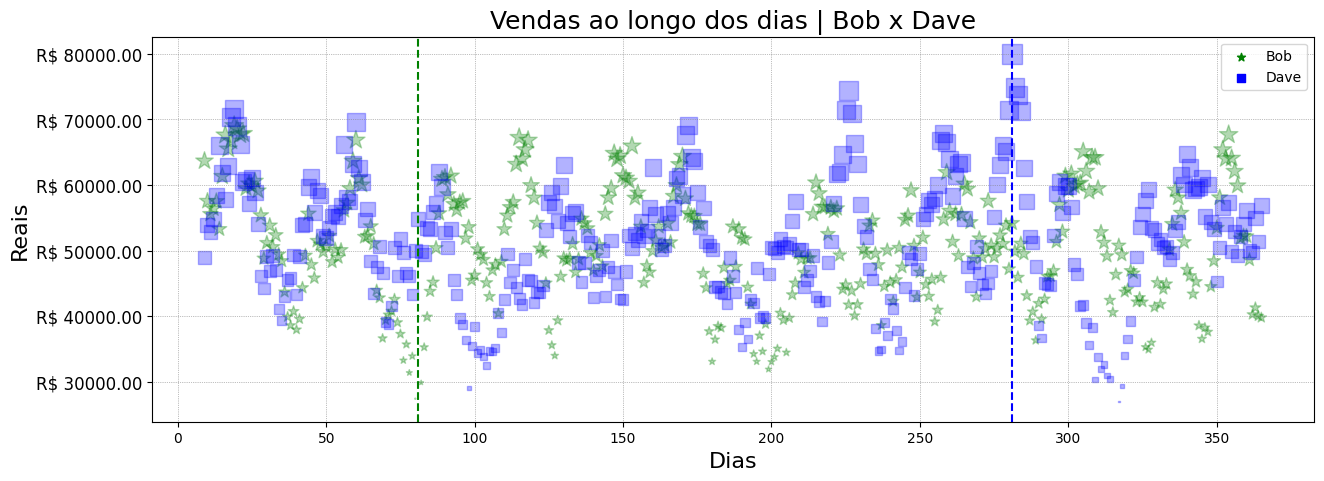

In [35]:
ax2.collections[0].set_alpha(0.3)
ax2.collections[1].set_alpha(0.3)
fig2

- Podemos fazer isso tudo de uma vez:

Text(0, 0.5, 'Reais')

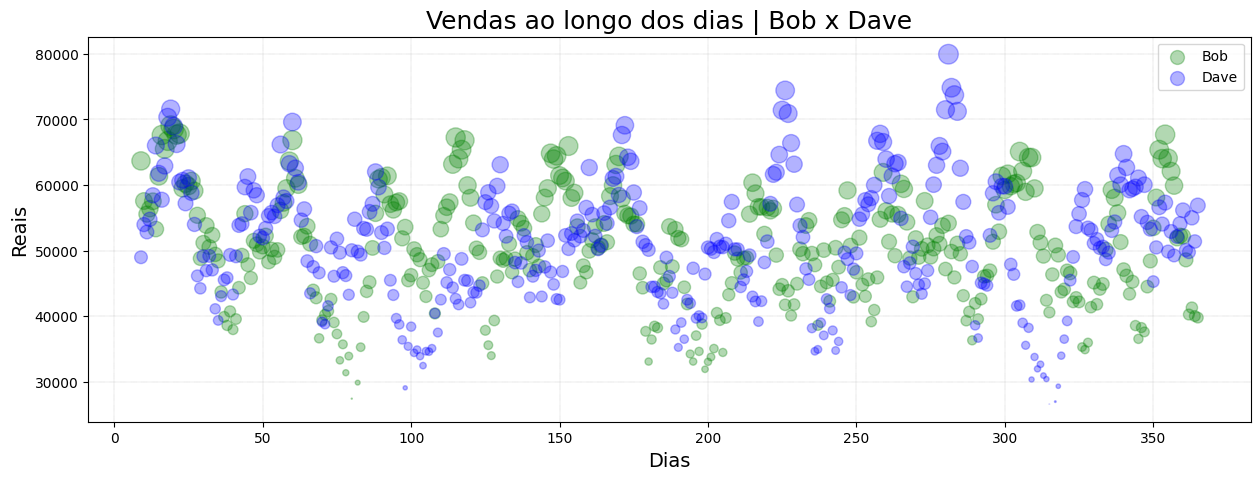

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
days = bob.index
ax.scatter(days, bob, color="g", label="Bob", sizes=lam_siz(bob), alpha=0.3)
ax.scatter(days, dave, color="b", label="Dave", sizes=lam_siz(dave), alpha=0.3)
ax.legend()
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set_title('Vendas ao longo dos dias | Bob x Dave', size=18)
ax.set_xlabel('Dias', size=14)
ax.set_ylabel('Reais', size=14)